#                                    AirBnb NYC Data Set (Regression and classification)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data loading

In [3]:
df= pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.253252,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.255046,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.009115,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.131599,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.022373,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.091942,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.530093,-0.072376,0.172028
reviews_per_month,0.253252,0.255046,-0.009115,0.131599,-0.022373,-0.091942,0.530093,1.000000,-0.006701,0.162980
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.006701,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.162980,0.225701,1.000000


## Graphs

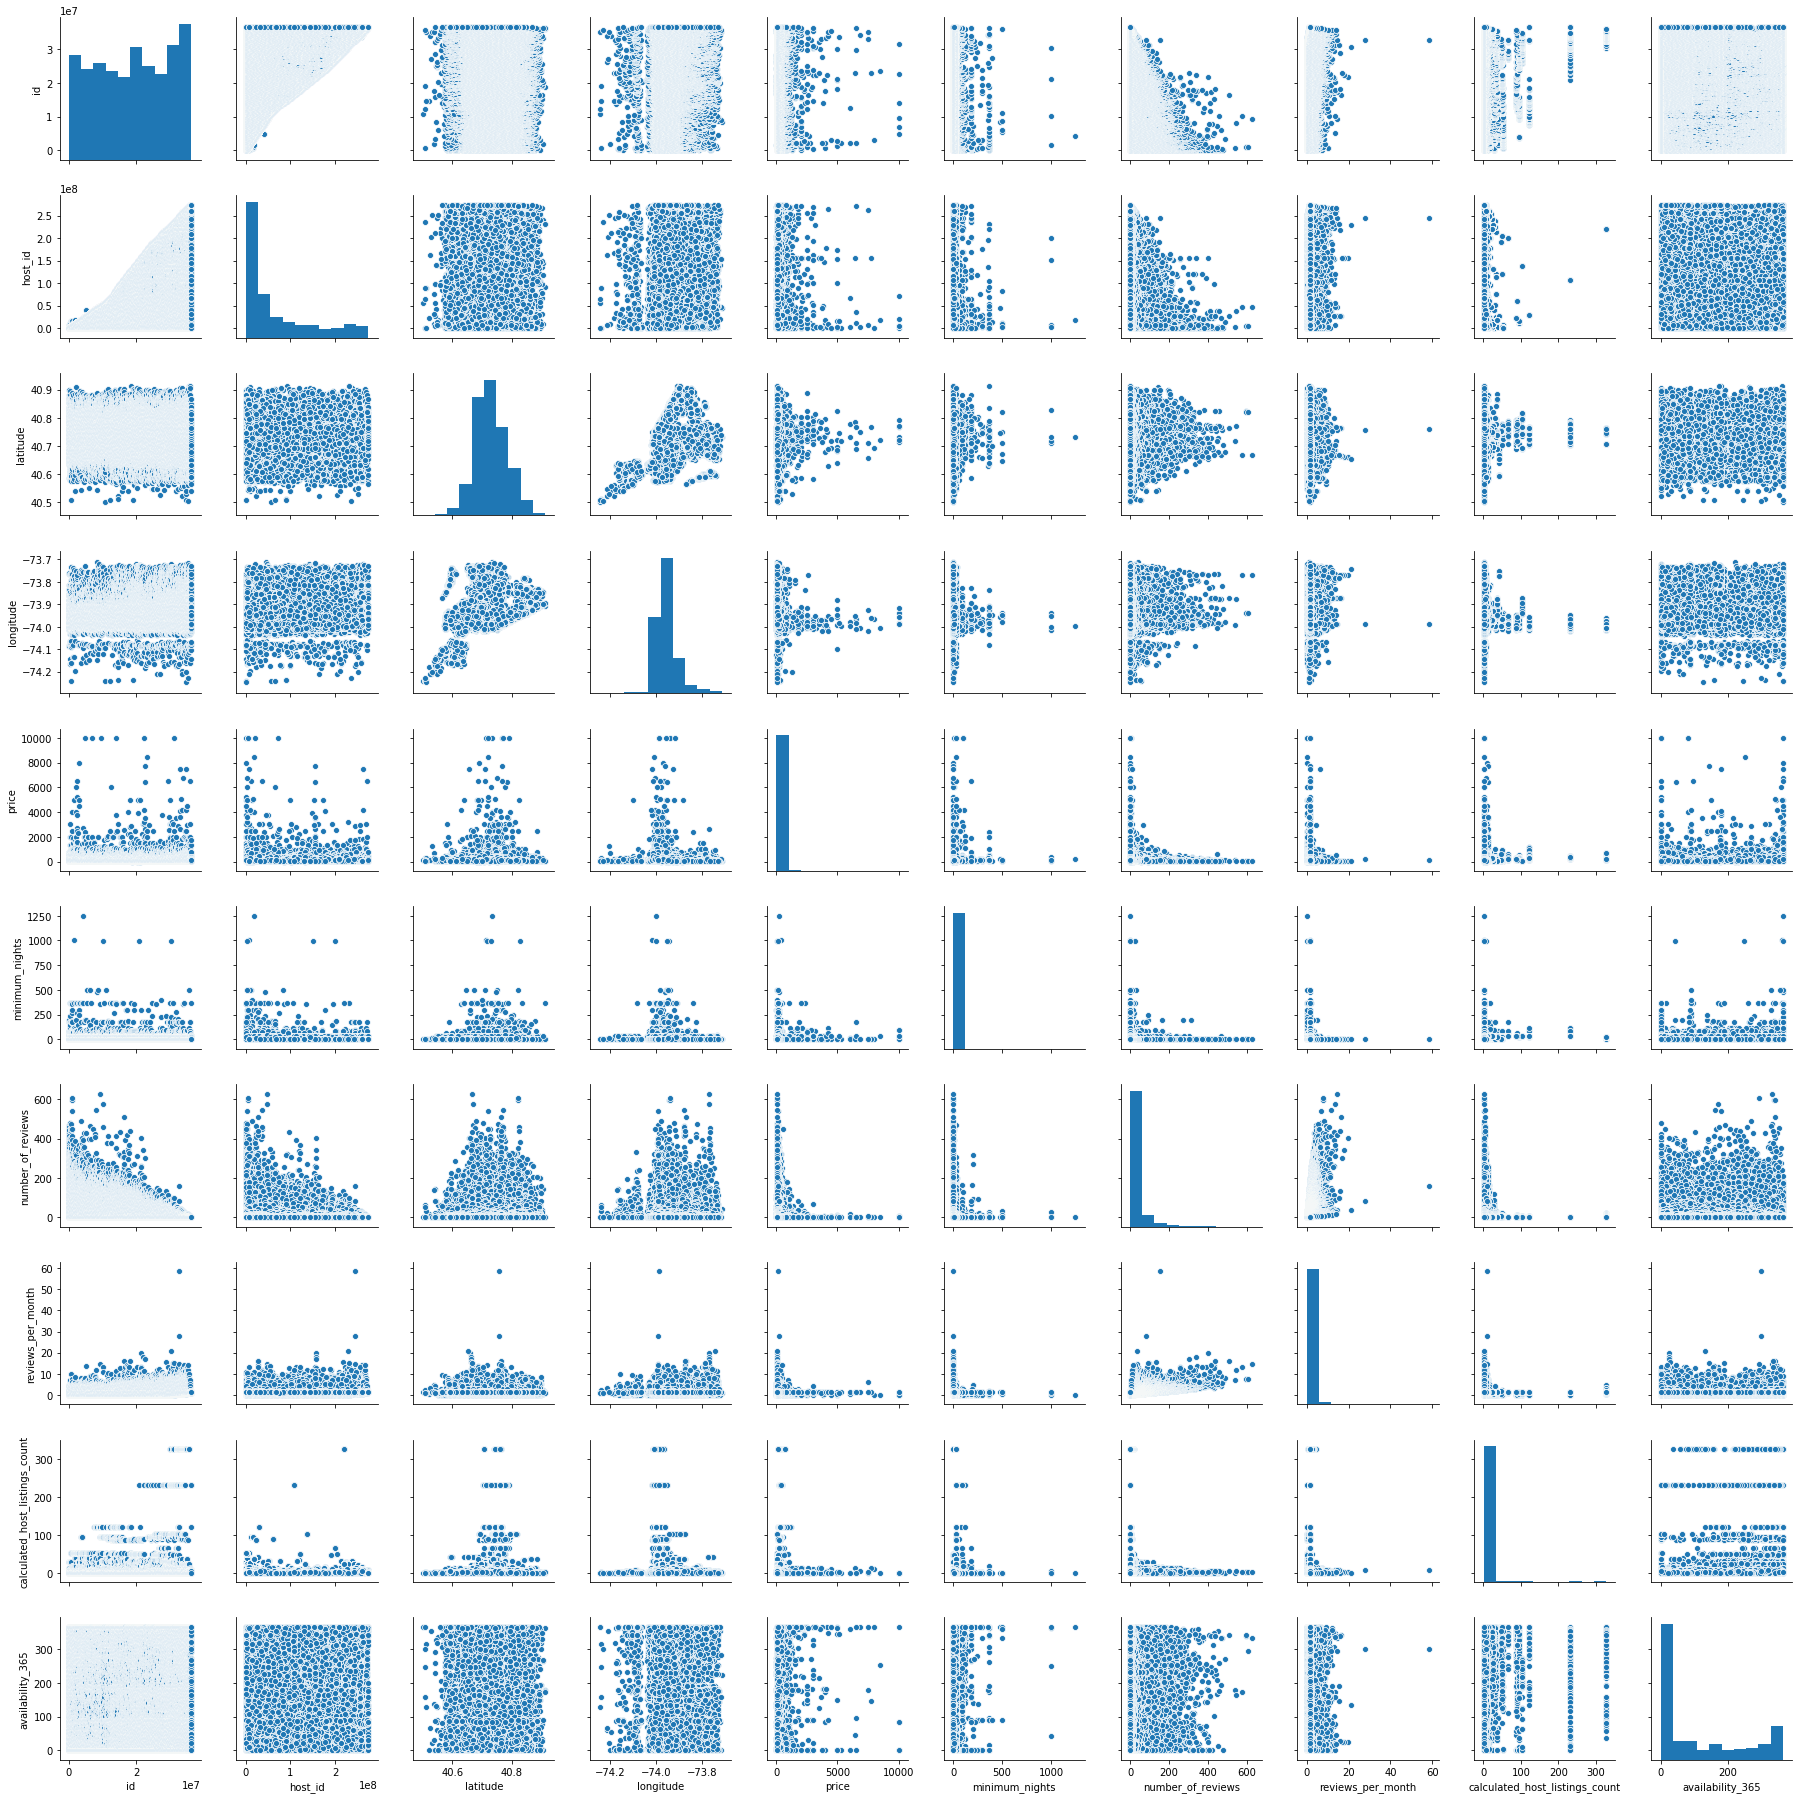

In [11]:
sns.pairplot(df)

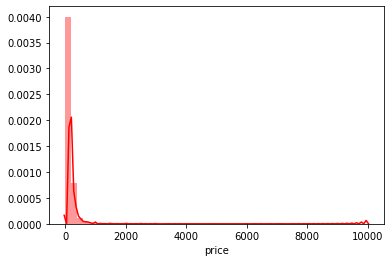

In [22]:
sns.distplot(df['price'], kde = True ,color='r')

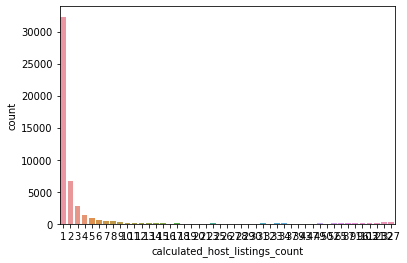

In [10]:
sns.countplot(df.calculated_host_listings_count)

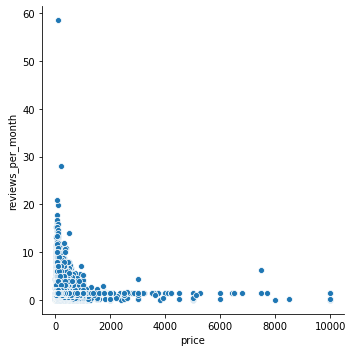

In [15]:
sns.relplot(x="price", y="reviews_per_month", data=df)

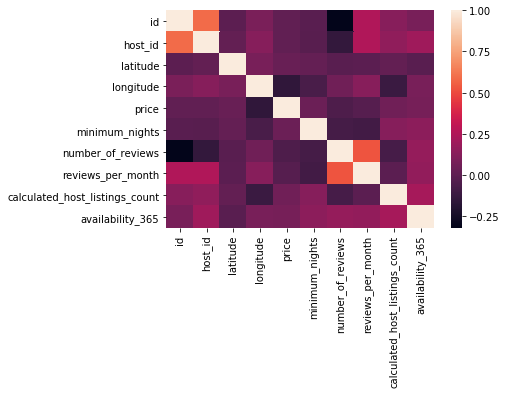

In [16]:
sns.heatmap(df.corr())

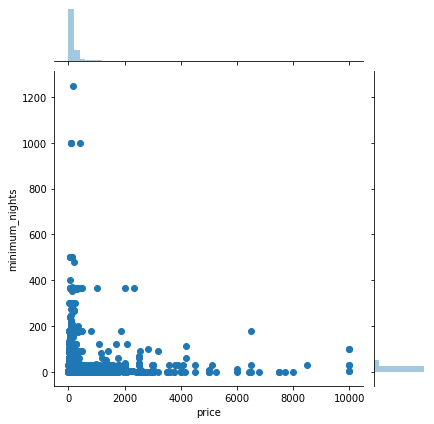

In [18]:
sns.jointplot(x = 'price', y = 'minimum_nights', data = df)

### Dropping unneeded columns

In [21]:
df.drop(['id','latitude', 'longitude'], inplace=True, axis=1)

## Filling NaN

1-st fill with mean numeric values

In [4]:
df = df.fillna(df.mean())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

2-nd fill with 'NA' object values

In [5]:
df = df.fillna('NA')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48895 non-null object
host_id                           48895 non-null int64
host_name                         48895 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       48895 non-null object
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

Droping columns with NaN values

In [19]:
df = df.dropna()

### Labael Encoding

1-st: LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, scale, MinMaxScaler, OneHotEncoder

In [26]:
le = LabelEncoder()
transformed_data = df.select_dtypes(include='object').apply(lambda x : le.fit_transform(x))

In [27]:
transformed_data.head(2)

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,12328,4989,1,108,1,1501
1,37456,4785,2,127,0,1715


In [29]:
df = df.drop(df.select_dtypes(include='object'), axis = 1)

In [30]:
df = pd.concat([df, transformed_data], axis = 1)

In [32]:
df.head(4)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,2539,2787,40.64749,-73.97237,149,1,9,0.210000,6,365,12328,4989,1,108,1,1501
1,2595,2845,40.75362,-73.98377,225,1,45,0.380000,2,355,37456,4785,2,127,0,1715
2,3647,4632,40.80902,-73.94190,150,3,0,1.373221,1,365,43544,2909,2,94,1,1764
3,3831,4869,40.68514,-73.95976,89,1,270,4.640000,1,194,14783,6203,1,41,0,1760


2-nd: get Dummies

In [13]:
df = pd.get_dummies(df, drop_first=True)

In [14]:
df.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,last_review_2019-06-30,last_review_2019-07-01,last_review_2019-07-02,last_review_2019-07-03,last_review_2019-07-04,last_review_2019-07-05,last_review_2019-07-06,last_review_2019-07-07,last_review_2019-07-08,last_review_NA
0,2539,2787,40.64749,-73.97237,149,1,9,0.210000,6,365,...,0,0,0,0,0,0,0,0,0,0
1,2595,2845,40.75362,-73.98377,225,1,45,0.380000,2,355,...,0,0,0,0,0,0,0,0,0,0
2,3647,4632,40.80902,-73.94190,150,3,0,1.373221,1,365,...,0,0,0,0,0,0,0,0,0,1
3,3831,4869,40.68514,-73.95976,89,1,270,4.640000,1,194,...,0,0,0,0,0,1,0,0,0,0
4,5022,7192,40.79851,-73.94399,80,10,9,0.100000,1,0,...,0,0,0,0,0,0,0,0,0,0


3rd: OneHotEncoding

In [7]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object

In [10]:
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) 

In [12]:
# X_ohe = ohe.fit_transform(df)

In [ ]:
X_ohe.head()

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop('price', axis = 1)
X.sample(2)

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,name_ 2-3 bedroom UWS garden triplex,name_ 3 bedroom loft in Williamsburg,name_ A charming Space in Brooklyn,name_ AMAZING TIME SQUARE!!BRICK WALLS!!,...,last_review_2019-06-30,last_review_2019-07-01,last_review_2019-07-02,last_review_2019-07-03,last_review_2019-07-04,last_review_2019-07-05,last_review_2019-07-06,last_review_2019-07-07,last_review_2019-07-08,last_review_NA
41787,136943521,1,11,2.34,1,157,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40640,137358866,30,1,0.25,103,186,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y = df['price']
y.sample(2)

37393    250
5460     230
Name: price, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling

In [25]:
scaler = StandardScaler().fit(X_train, y_train)

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_test)

In [32]:
X_train_scaled.shape, X_train.shape

((14669, 61353), (34226, 61353))

## Model selection and Building

### Random forest regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
r_forest = RandomForestRegressor()

In [33]:
r_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
predictions = r_forest.predict(X_test)

In [35]:
from sklearn.metrics import *

In [37]:
print(np.sqrt(mean_squared_error(y_test, predictions)))

183.59769994196068


### Using GridSearchCV for parms tunnig

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'max_depth': [2,3,4], 
          'n_estimators': [30, 50, 100],
         'min_samples_split': [2, 3, 4]}

In [ ]:
rforest_cv = GridSearchCV(estimator=rforest, param_grid=params, cv=10, verbose=3)

In [ ]:
rforest_cv.fit(X_train, y_train)

In [ ]:
rforest_cv.best_params_

In [ ]:
predictions = rforest_cv.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y_test, preds)))

# Classification problem

In [2]:
df= pd.read_csv('flight_delays.csv')

In [3]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


##### Drop columns

In [4]:
df.drop(['UniqueCarrier', 'DayOfWeek'], inplace=True, axis=1)

##### Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, scale, MinMaxScaler, OneHotEncoder
le = LabelEncoder()
df_cat = df.select_dtypes(include='object').apply(lambda x : le.fit_transform(x))

In [6]:
df = df.drop(df.select_dtypes(include='object'), axis = 1)
df = pd.concat([df, df_cat], axis = 1)

In [7]:
X = df.drop('dep_delayed_15min', axis = 1)
y = df['dep_delayed_15min']

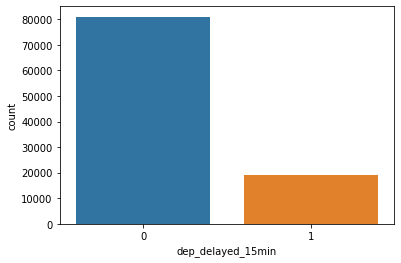

In [29]:
sns.countplot(y)

### Resampling
##### Under sampling

In [10]:
from imblearn.under_sampling import RandomUnderSampler

In [12]:
random_under_sampler = RandomUnderSampler()
X_under, y_under = random_under_sampler.fit_sample(X, y)

In [15]:
X_under.shape, y_under.shape

((38088, 6), (38088,))

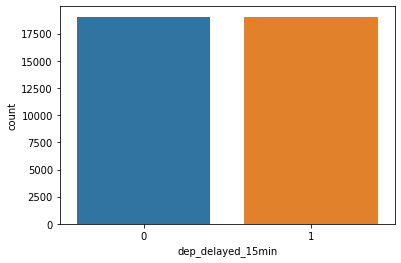

In [30]:
sns.countplot(y_under)

##### Over sampling

In [8]:
from imblearn.over_sampling import RandomOverSampler #->another variant #from imblearn.over_sampling import SMOTE
random_over_sampler = RandomOverSampler()
X_over, y_over = random_over_sampler.fit_sample(X, y)

In [9]:
X_over.shape, y_over.shape

((161912, 6), (161912,))

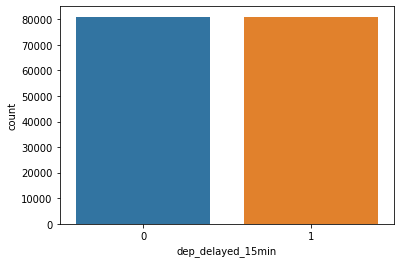

In [10]:
sns.countplot(y_over)

### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

#### XGboost and hyperparms

###### vanila

In [32]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test) 

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70     24141
           1       0.70      0.75      0.73     24433

    accuracy                           0.72     48574
   macro avg       0.72      0.72      0.72     48574
weighted avg       0.72      0.72      0.72     48574



In [34]:
print(confusion_matrix(y_test, pred))

[[16367  7774]
 [ 6036 18397]]


In [36]:
print("Accuracy: ", accuracy_score(y_test, pred), "\nf1 score:", f1_score(y_test, pred), "\nRoc Auc Score", roc_auc_score(y_test, pred))

Accuracy:  0.7156915222135298 
f1 score: 0.7270966721998262 
Roc Auc Score 0.7154661475633001


###### with tuning

In [37]:
import xgboost as xgb

In [38]:
xgb_model = xgb.XGBClassifier(n_jobs = -1,max_depth = 20, min_child_weight = 1, max_delta_step = 2)
xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test) 

#### Classification Report

In [15]:
from sklearn.metrics import *

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     24141
           1       0.89      0.97      0.93     24433

    accuracy                           0.92     48574
   macro avg       0.93      0.92      0.92     48574
weighted avg       0.93      0.92      0.92     48574



In [41]:
print(confusion_matrix(y_test, pred))

[[21199  2942]
 [  706 23727]]


In [42]:
print("Accuracy: ", accuracy_score(y_test, pred), "\nf1 score:", f1_score(y_test, pred), "\nRoc Auc Score", roc_auc_score(y_test, pred))

Accuracy:  0.9248980936303373 
f1 score: 0.9286133615122695 
Roc Auc Score 0.9246186454820768


# Another models:

#### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_cls = KNeighborsClassifier()
knn_cls.fit(X_train, y_train)
pred = knn_cls.predict(X_test)

In [50]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74     24141
           1       0.73      0.85      0.78     24433

    accuracy                           0.76     48574
   macro avg       0.77      0.76      0.76     48574
weighted avg       0.77      0.76      0.76     48574



#### LogisticRegression

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

In [52]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62     24141
           1       0.63      0.64      0.63     24433

    accuracy                           0.63     48574
   macro avg       0.63      0.63      0.63     48574
weighted avg       0.63      0.63      0.63     48574



#### SVM

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')# different kernels
svclassifier.fit(X_train, y_train)
pred = svclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

#### Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62     24141
           1       0.63      0.67      0.65     24433

    accuracy                           0.63     48574
   macro avg       0.63      0.63      0.63     48574
weighted avg       0.63      0.63      0.63     48574



#### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)

In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     24141
           1       0.83      0.97      0.89     24433

    accuracy                           0.88     48574
   macro avg       0.90      0.88      0.88     48574
weighted avg       0.90      0.88      0.88     48574



#### LightGBM

In [13]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(max_depth=20,  n_estimators=400,num_leaves=1300)
lgb_model.fit(X_train, y_train)
pred = lgb_model.predict(X_test) 

In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     24141
           1       0.90      0.97      0.93     24433

    accuracy                           0.93     48574
   macro avg       0.93      0.93      0.93     48574
weighted avg       0.93      0.93      0.93     48574

